---

### Volume and OHLC on _Same_ Panel:

## Stack Overflow [72341261](https://stackoverflow.com/questions/72341261/ohlc-and-volume-data-on-the-same-panel-using-mplfinance)

(this notebook derived from examples/panels.ipynb)

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Let's grab 5 months of data from the input data frame:

In [4]:
df = idf.loc['2011-07-01':'2011-12-30',:]

---

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.9b0'

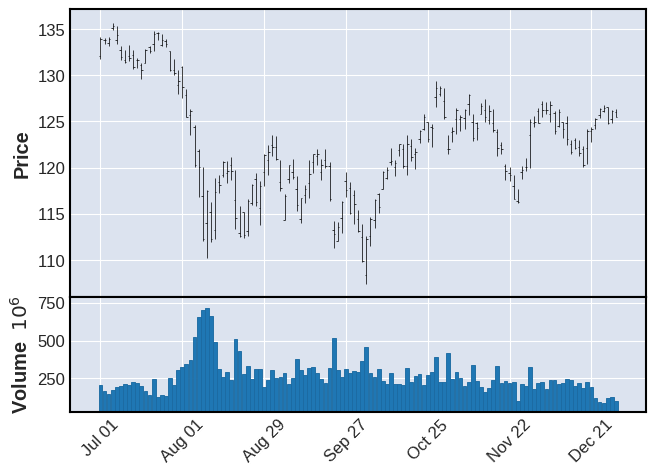

In [5]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True)

In [6]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

In [7]:
macd = exp12 - exp26

In [8]:
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

---

### Now create our MACD plot:

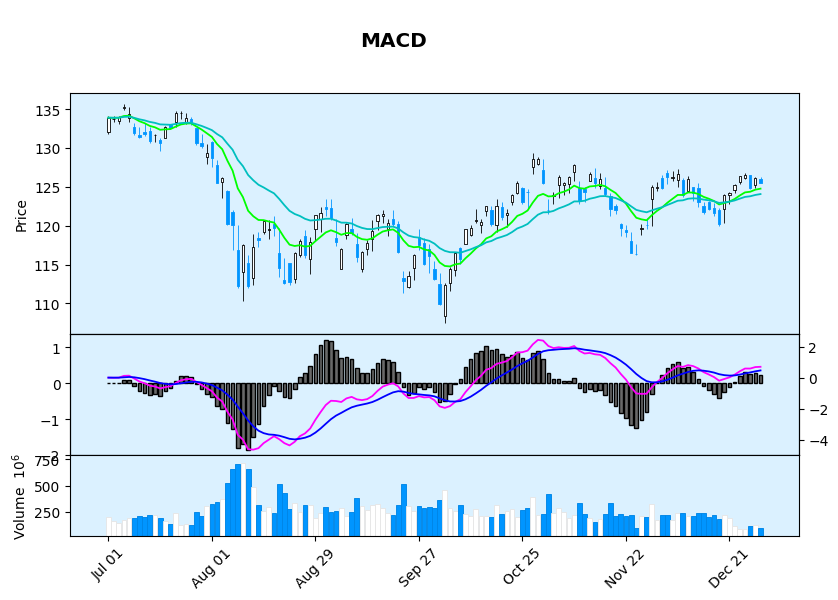

In [9]:
apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

mpf.plot(df,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style='blueskies',volume=True,volume_panel=2,panel_ratios=(6,3,2))

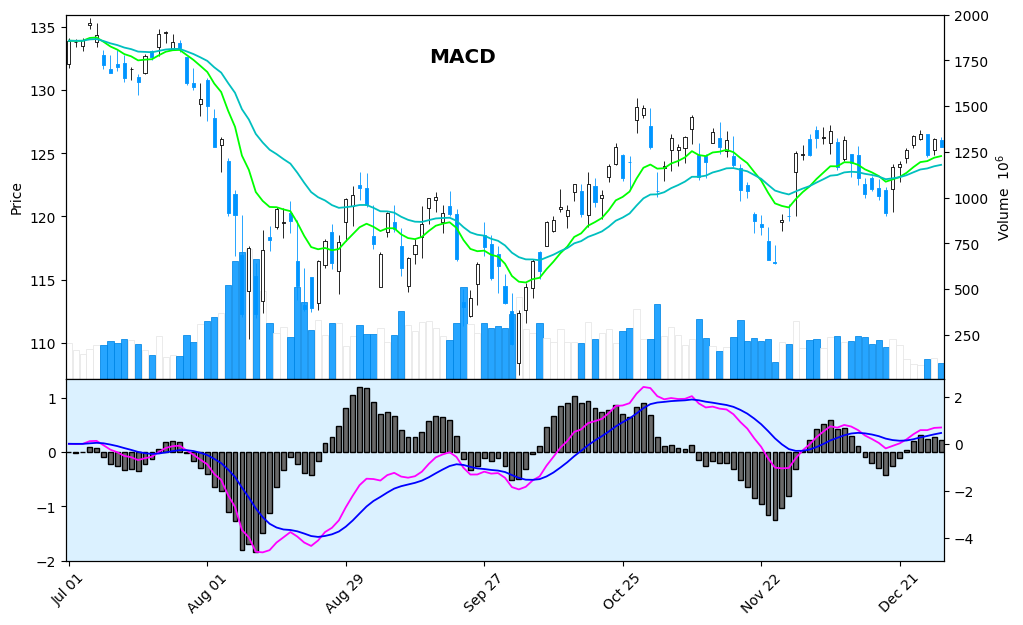

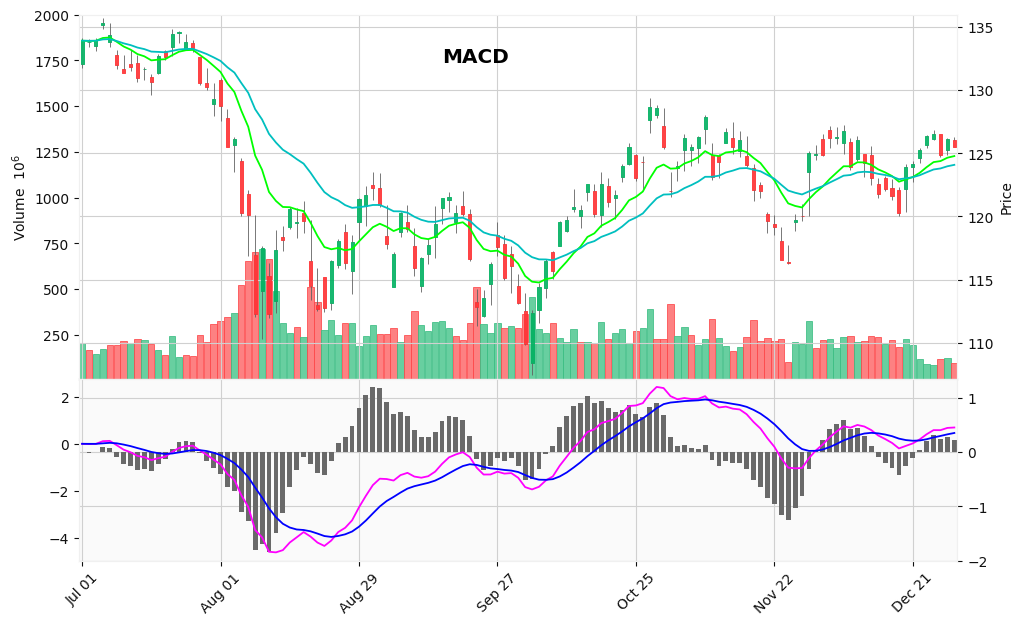

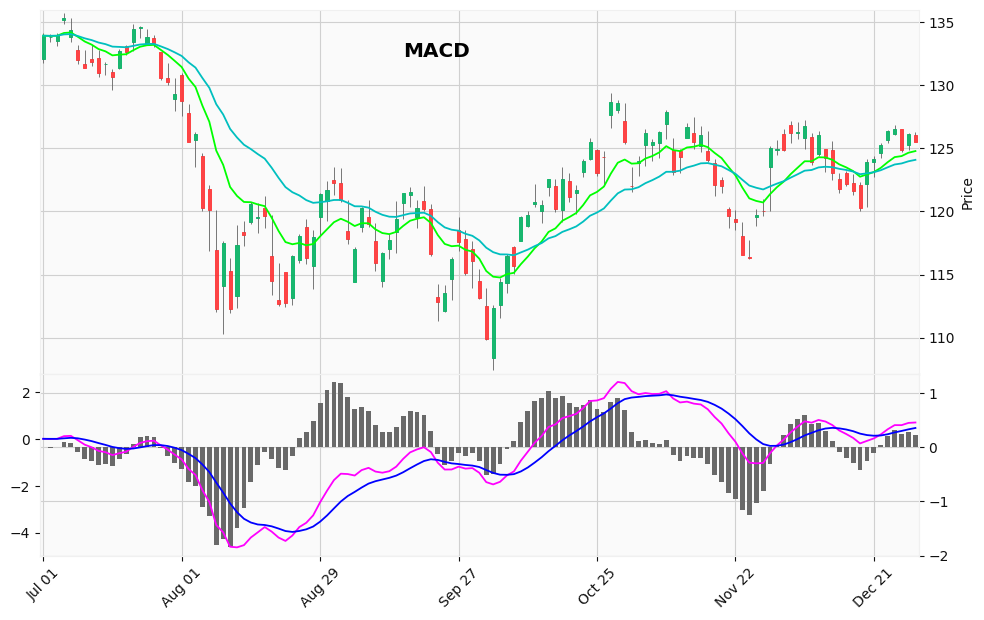

In [10]:
apds = [mpf.make_addplot(exp12,color='lime',secondary_y=False),
        mpf.make_addplot(exp26,color='c',secondary_y=False),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

fig,axlist = mpf.plot(df,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
                      style='blueskies',volume=True,volume_panel=0,panel_ratios=(6,3),returnfig=True,
                      volume_alpha=0.85,volume_ylim=(10022710,2000611570),tight_layout=True)
fig,axlist = mpf.plot(df,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
                      style='yahoo',volume=True,volume_panel=0,panel_ratios=(6,3),returnfig=True,
                      volume_alpha=0.85,volume_ylim=(10022710,2000611570),tight_layout=True)
fig,axlist = mpf.plot(df,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
                      style='yahoo',volume=False,volume_panel=0,panel_ratios=(6,3),returnfig=True,
                      volume_alpha=0.85,volume_ylim=(10022710,2000611570),tight_layout=True)

In [11]:
for ax in axlist:
    print(ax,ax.get_visible())

Axes(0.108,0.395733;0.868x0.575467) True
Axes(0.108,0.395733;0.868x0.575467) False
Axes(0.108,0.108;0.868x0.287733) True
Axes(0.108,0.108;0.868x0.287733) True


In [12]:
children = axlist[0].get_children()
zorders = [c.get_zorder() for c in children]
print(zorders)
print()
children = axlist[1].get_children()
zorders = [c.get_zorder() for c in children]
print(zorders)

[2, 1, 2, 2, 2.5, 2.5, 2.5, 2.5, 0.5, 0.5, 3, 3, 3, 1]

[2.5, 2.5, 2.5, 2.5, 1.5, 1.5, 3, 3, 3, 1]


In [13]:
all([z == 1.0 for z in zorders])

False